## CSE330 Lab: Polynomial Interpolation using Lagrange Form
---

###1. Importing necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

###2. Writing the LagrangePolynomial class

i) The constructor `__init__` has been written for you. 
    
  * Here, we check whether the input vectors (numpy arrays) are equal or not. 
  * We store `data_x` and `data_y`
  * We calculate and store the degree of the polynomial.

ii) The `__repr__` function has been written for you. 

* This is similar to the toString() method in Java. This returns a formatted string of the object whenever the object is printed.


**iii) You have to write the `__call__` function.** 

* This function makes an object of a class callable.
* The function calculates the lagrange polynomial from a set of given nodes. `self.x` and `self.y` contains the coordinates of the given nodes of the original function. You have to use `self.x` and `self.y` in equations $1$ and $2$ below to find the interpolated output of the polynomial for all elements of `x`.
`x` is a numpy array containing points through which we want to plot our polynomial. 



General form for a $n$ degree Lagrange polynomial:

\begin{equation}
p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x)\tag{1}
\end{equation}

where,
\begin{equation}
l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j} \tag{2}
\end{equation}

Note that the Lagrange method is more efficient than the matrix method since we do not need to calculate any inverse matrices.


In [5]:
class LagrangePolynomial:
  def __init__(self, data_x, data_y):
    '''
    First we need to check whether the input vectors (numpy arrays) are equal 
    or not. 
    assert (condition), "msg"
    this command checks if the condition is true or false. If true, the code 
    runs normally. But if false, then the code returns an error message "msg"
    and stops execution
    '''
    assert len(data_x) == len(data_y), "length of data_x and data_y must be equal"

    '''
    Since lagrange polynomials do not use coefficeints a_i, rather the nodes 
    (x_i, y_i), we just need to store these inside the object
    '''

    self.x = data_x
    self.y = data_y
    
    self.degree = len(data_x) - 1
    # we assume that the inputs are numpy array, so we can perform 
    # element wise operations

  def __repr__(self):
    # method for string representation
    # you don't need to worry about the following code if you don't understand
    strL = f"LagrangePolynomial of order {self.degree}\n"
    strL += "p(x) = "
    for i in range(len(self.y)):
      if self.y[i] == 0:
        continue
      elif self.y[i] >= 0:
        strL += f"+ {self.y[i]}*l_{i}(x) "
      else:
        strL += f"- {-self.y[i]}*l_{i}(x) "

    return strL

  def __call__(self, x):
    y_interp  = np.array([],float)
    for p in x:
      term = 0
      for i, j in zip(data_x, data_y):
        term += j * np.prod((p - data_x[data_x != i]) / (i - data_x[data_x != i]))
      y_interp = np.append(y_interp, term)
    
    
    return y_interp
 

###3. Calling the `LagrangePolynomial` object and plotting the polynomial.

First we create a lagrange polynomial object, `p` by calling `LagrangePolynomial(data_x, data_y)`. Then, we call the object as a function (which is possible because we had implemented a `__call__` function in the `LagrangePolynomial` class) and pass in `x`. `x` is 1D numpy array (a vector) which we created using `linspace` function and contains $x_i$, i.e. the points through which we want to plot our polynomial. Calling the object as a function and inputting `x` returns the corresponding $y_i$ values and stores them in the `y_interp` numpy array. 

Finally, the polynomial is plotted by passing in $x$ and $y_{interp}$ in `plt.plot()`, i.e. the $x_i$ and $y_i$ pairs. 

Note that in the plot the given nodes will be marked in red.

LagrangePolynomial of order 6
p(x) = - 60.0*l_0(x) - 80.0*l_1(x) + 6.0*l_2(x) + 1.0*l_3(x) + 45.0*l_4(x) + 30.0*l_5(x) + 16.0*l_6(x) 


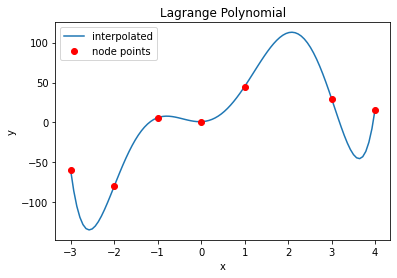

In [6]:
data_x = np.array([-3.,-2.,-1.,0.,1.,3.,4.])
data_y = np.array([-60.,-80.,6.,1.,45.,30.,16.])

p = LagrangePolynomial(data_x, data_y)
print(p)
#generating 100 points from -3 to 4 in order to create a smooth line
x = np.linspace(-3, 4, 100)
y_interp = p(x)

# plot to see if your implementation is correct
#google the functions to understand what each parameters mean, if not apparent
plt.plot(x, y_interp)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')

plt.show()